In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist # Corrected 'dataset' to 'datasets' and 'minst' to 'mnist'
from tensorflow.keras.models import Sequential # Corrected 'tensor.keras' to 'tensorflow.keras'
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout # Corrected 'tensor.keras' to 'tensorflow.keras'
from tensorflow.keras.utils import to_categorical # Corrected 'tensor.keras' to 'tensorflow.keras'
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train=x_train.reshape((x_train.shape[0],28,28,1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)


In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_split=0.1,epochs=5,batch_size=128,verbose=2)
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print(f'Test accuracy:{test_acc:.4f}')


Epoch 1/5
422/422 - 13s - 30ms/step - accuracy: 0.8823 - loss: 0.3780 - val_accuracy: 0.9798 - val_loss: 0.0716
Epoch 2/5
422/422 - 2s - 4ms/step - accuracy: 0.9626 - loss: 0.1240 - val_accuracy: 0.9863 - val_loss: 0.0454
Epoch 3/5
422/422 - 2s - 4ms/step - accuracy: 0.9727 - loss: 0.0914 - val_accuracy: 0.9892 - val_loss: 0.0389
Epoch 4/5
422/422 - 2s - 4ms/step - accuracy: 0.9770 - loss: 0.0750 - val_accuracy: 0.9887 - val_loss: 0.0375
Epoch 5/5
422/422 - 2s - 4ms/step - accuracy: 0.9800 - loss: 0.0650 - val_accuracy: 0.9900 - val_loss: 0.0348
313/313 - 2s - 5ms/step - accuracy: 0.9905 - loss: 0.0283
Test accuracy:0.9905


MODEL


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

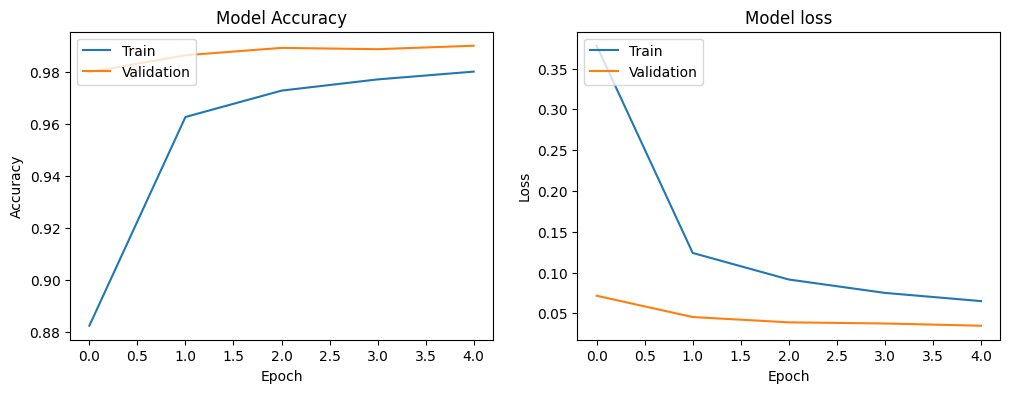

In [7]:
print("="*70)
print("MODEL")
model.summary()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


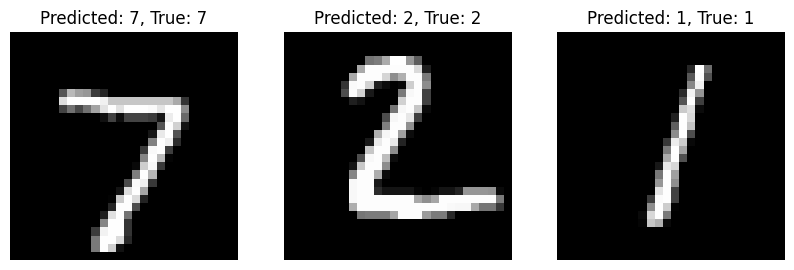

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

predictions = model.predict(x_test)

predicted_labels = [int(tf.argmax(tf.convert_to_tensor(prediction))) for prediction in predictions]

plt.figure(figsize=(10, 4))
num_images = 3

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, True: {np.argmax(y_test[i])}")
    plt.axis('off')